# Sınıflandırma Modeli Değerlendirme
---

## Veri Seti Hikayesi

- Müşterinin churn olup olmama durumunu tahminleyen bir sınıflandırma modeli oluşturulmuştur.
- 10 test verisi gözleminin gerçek değerleri ve modelin tahmin ettiği olasılık değerleri verilmiştir.

---

### **Görev 1:**
- Eşik değerini (threshold value) 0.5 alarak confusion matrix oluşturunuz.
- Accuracy,Recall,Precision,F1 Skorlarını hesaplayınız.
---

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate

In [19]:
data = {
    "gercek_deger": [1,1,1,1,1,1,0,0,0,0],
    "1_sinifina_ait_olma_olasiliği": [0.7,0.8,0.65,0.9,0.45,0.5,0.55,0.35,0.4,0.25]
}

df = pd.DataFrame(data)
df


,gercek_deger,1_sinifina_ait_olma_olasiliği
0,1,0.70
1,1,0.80
2,1,0.65
3,1,0.90
4,1,0.45
5,1,0.50
6,0,0.55
7,0,0.35
8,0,0.40
9,0,0.25


- **Confusion Matrix:** Bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir tablodur. Gerçek değerler ile modelin tahmin ettiği değerlerin karşılaştırılması sonucu oluşan dört farklı sonuç (true positive, false positive, true negative, false negative) temel alınarak oluşturulur.Bu tablo sayesinde, modelin hangi sınıflar için daha başarılı veya başarısız olduğu hakkında bilgi sahibi olunabilir ve modelin geliştirilmesi için gerekli adımlar atılabilir.



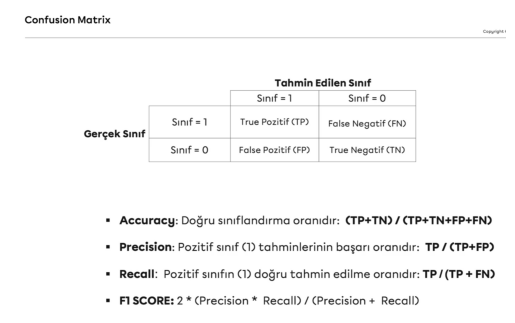

In [17]:
#import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('confusion_matrix.PNG')
plt.imshow(img)
plt.axis('off')  # Eksenleri ve çerçeveyi kapattık
plt.show()

- True Positive (TP): Gerçek sınıfı pozitif olan gözlemlerin, model tarafından da pozitif olarak tahmin edildiği sayıdır.
- False Positive (FP): Gerçek sınıfı negatif olan gözlemlerin, model tarafından pozitif olarak tahmin edildiği sayıdır.
- True Negative (TN): Gerçek sınıfı negatif olan gözlemlerin, model tarafından da negatif olarak tahmin edildiği sayıdır.
- False Negative (FN): Gerçek sınıfı pozitif olan gözlemlerin, model tarafından negatif olarak tahmin edildiği sayıdır.

 **Sınıflandırma modelinin performansını değerlendirmek için bu değerler kullanılarak aşağıdaki metrikler hesaplanabilir:**

- Accuracy: (TP+TN) / (TP+FP+TN+FN)
- Precision: TP / (TP+FP)
- Recall (Sensitivity): TP / (TP+FN)
- F1 score: 2*(precision*recall)/(precision+recall)

- **Not:** F1 score, bir sınıflandırma modelinin performansını ölçmek için kullanılan bir metriktir ve precision (kesinlik) ve recall (duyarlılık) değerlerinin harmonik ortalamasıdır.F1 score, 0 ile 1 arasında bir değer alır ve daha yüksek bir F1 score, modelin daha iyi bir performans gösterdiğini gösterir.

In [26]:
threshold_value = 0.5 

y_true = df["gercek_deger"]

y_pred = df["1_sinifina_ait_olma_olasiliği"].apply(lambda x: 1 if x >= threshold_value else 0)

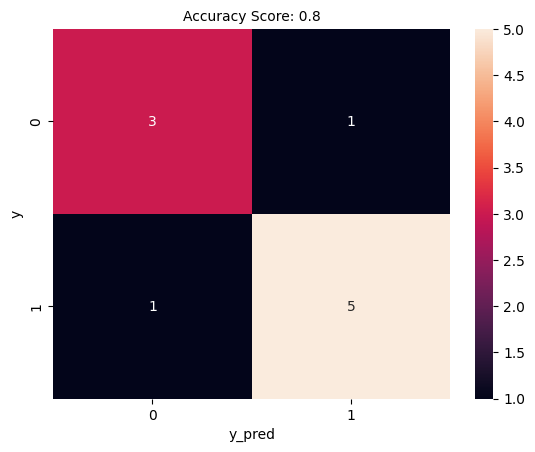

In [27]:
def plot_confusion_matrix(y_true, y_pred):
    acc = round(accuracy_score(y_true, y_pred), 2)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_true, y_pred)

- TP (True Positive) değeri: 5
- FP (False Positive) değeri: 1
- TN (True Negative) değeri: 3
- FN (False Negative) değeri: 1

- Gerçekte negatif olan 4 gözlem verisi var (0'a ait), bunların 3'ü doğru bir şekilde negatif olarak tahmin edilmiş (True Negative), 1'i ise yanlış bir şekilde pozitif olarak tahmin edilmiş (False Positive).
- Gerçekte pozitif olan 6 gözlem verisi var (1'e ait), bunların 5'i doğru bir şekilde pozitif olarak tahmin edilmiş (True Positive), 1'i ise yanlış bir şekilde negatif olarak tahmin edilmiş (False Negative).

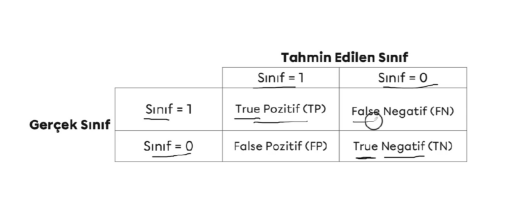

In [32]:
img = Image.open('confusion_matrixxx.PNG')
plt.imshow(img)
plt.axis('off')  # Eksenleri ve çerçeveyi kapattık
plt.show()

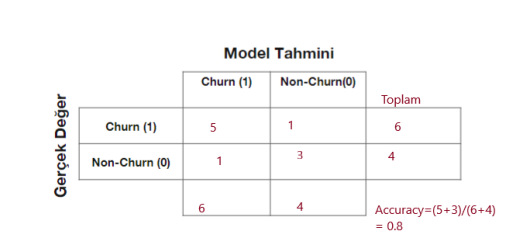

In [29]:
img = Image.open('confusion_matrixx.PNG')
plt.imshow(img)
plt.axis('off')  # Eksenleri ve çerçeveyi kapattık
plt.show()

In [25]:
#Accuracy,Recall,Precision,F1 Skorlarını hesaplayınız.
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



- support : ilgili sınıfların frekansını ifade ediyor.
- 1 sınıfına göre başarı metriklerini yorumlayalım.
- precision '1 e göre baktığımızda 1 olarak yaptığımız tahminlerin %83 ü başarılıymış.
-recall değeri 1 olanları %83 başarılı olarak sınıflandırmışız.
- harmonik ortalaması ise %83 


- Accuracy:  0.80 
- Precision: 0.83
- Recall: 0.83
- F1-score: 0.83

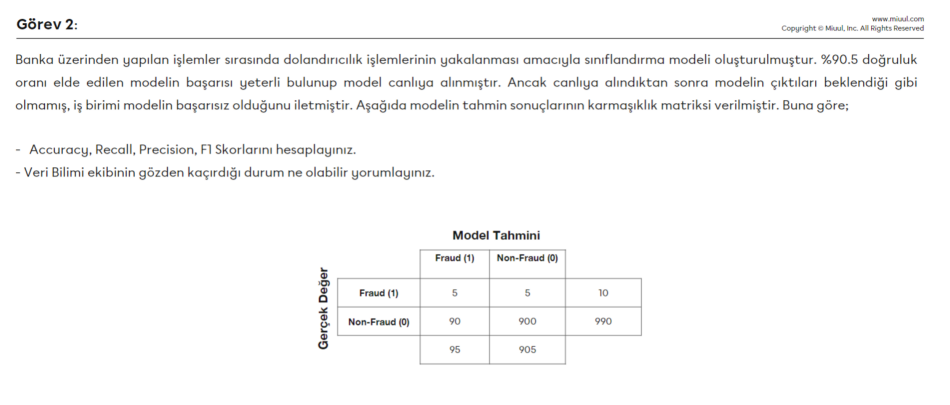

In [31]:
img = Image.open('Görev 2.PNG')
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')  # Eksenleri ve çerçeveyi kapattık
plt.show()

- TP (True Positive) değeri: 5
- FP (False Positive) değeri: 90
- TN (True Negative) değeri: 900
- FN (False Negative) değeri: 5

In [34]:

TP = 5
FP = 90
TN = 900
FN = 5

In [36]:
# Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)
accuracy

0.905

In [37]:
# Recall 
recall = TP / (TP + FN)
recall

0.5

In [41]:
# Precision

precision = TP / (TP + FP)
precision 

0.05263157894736842

In [39]:
# F1 score
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.09523809523809525



### Veri Bilimi ekibinin gözden kaçırdığı durum ne olabilir yorumlayınız.
---

- Sınıflar arasındaki dengesizlik performansı etkileyebilir. Örneğin, gerçek poziti(5) ve gerçek negatif(900) sayıları arasındaki farkın çok büyük olması, modelin bir sınıfı diğerine göre daha iyi tahmin etmesine neden olabilir. Bu nedenle, modelin performansının ölçülmesi ve iyileştirilmesi için dengeli bir veri kümesi kullanılması önemlidir. 

- Ayrıca modele negatif sınıfı daha iyi tahmin etme eğilimi var. Bu durumda, model doğru sınıfı tahmin ettiğinde bile, gerçek pozitifleri(TP) daha düşük bir oranda tahmin edebilir.

- Modelin eğitim ve test veri kümesinin farklı olması, modelin hiperparametrelerinin yanlış ayarlanması ve modelin yanlış bir algoritma kullanılması gibi gözden kaçırılan durumlar olabilir. 